# Part 1 - Introduction and Data Description

For this demonstration, we will use a bank marketing data set. A bank ran a marketing campaign in the past and has obtained data pertaining to nearly 45,000 customers, which includes variables such as their age, jobs, bank balance, education, loan status and so on. The bank wants to develop its future strategies based on the insights that it drew from the previous campaign and improve for the next campaign so that more customers agree to open term deposits with the bank.

Here, ***y*** (whether the customer wishes to open a deposit or not) is the target variable. A ***yes*** in the ***y*** column indicates that the campaign was successful and the customer agreed to open a term deposit account with the bank. In contrast, a ***no*** in the ***y*** column indicates that the campaign was not very successful and the customer could not be convinced to open a term deposit account.

The purpose of this demonstration is to show the learner how to build and implement random forest models and gradient boosted tree models for classification. We will also look at how model performance varies for different values of various hyperparameters.

## Data description

### Input features
- ***age*** : Age of the customer (numeric)
- ***job*** : Type of job (categorical)
- ***marital*** : Marital status (categorical)
- ***education***: Level of education (categorical)
- ***default***: Does the customer have a credit default or not? (categorical: *no*, *yes*, *unknown*)
- ***balance***: Bank balance of the customer (numeric)
- ***housing***: Does the customer have a housing loan or not? (categorical: *no*, *yes*, *unknown*)
- ***loan***: Does the customer have a personal loan or not? (categorical: *no*, *yes*, *unknown*)
- ***contact***: Contact communication type (categorical)
- ***day***: Last contact day of the week (categorical)
- ***month***: Last contact month of year (categorical)
- ***duration***: Last contact duration, in seconds (numeric)
- ***campaign***: Number of contacts performed during this campaign and for this client (numeric, includes last contact)
- ***pdays***: Number of days that passed by after the client was last contacted from a previous campaign (numeric)
- ***previous***: Number of contacts performed before this campaign and for this client (numeric)
- ***poutcome***: Outcome of the previous marketing campaign (categorical)

### Output feature
- ***y***: Has the client subscribed a term deposit? (categorical: ***yes***, ***no***)

In [5]:
# Import 'numpy' and 'pandas' for working with numbers and data frames
import numpy as np
import pandas as pd

# Import 'matplotlib.pyplot' and 'seaborn' for visualizations
from matplotlib import pyplot as plt
import seaborn as sns

# Import packages for building ensemble models
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier 

# Import method for train-test split
from sklearn.model_selection import train_test_split

# Import sutiable error measure methods
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, roc_auc_score

# Import 'GridSearchCV' for hyperparameter tuning
from sklearn.model_selection import GridSearchCV

In [6]:
# Import the raw data
url = 'https://raw.githubusercontent.com/liyemaumd/data/main/bank.csv'
df = pd.read_csv(url)

In [7]:
# Take a look at the data
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,services,single,secondary,no,405,yes,no,cellular,5,feb,103,1,265,2,other,no
1,42,management,married,tertiary,no,3841,yes,no,cellular,25,jul,720,2,-1,0,unknown,no
2,46,technician,married,secondary,no,0,yes,no,unknown,4,jun,242,5,-1,0,unknown,no
3,59,retired,married,primary,no,2632,no,no,cellular,3,jun,123,1,-1,0,unknown,no
4,33,technician,single,secondary,no,291,no,no,cellular,25,aug,72,6,-1,0,unknown,no


In [11]:
df.sample(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
10162,43,technician,married,secondary,no,-1701,yes,no,unknown,26,may,285,1,-1,0,unknown,no
11344,47,blue-collar,divorced,primary,no,7,no,yes,unknown,16,jun,219,7,-1,0,unknown,no
30518,40,housemaid,married,secondary,no,864,no,no,cellular,14,aug,36,2,-1,0,unknown,no
43189,54,blue-collar,married,secondary,no,524,yes,no,unknown,15,may,55,1,-1,0,unknown,no
9554,36,admin.,single,tertiary,no,980,no,no,cellular,11,nov,118,4,104,7,failure,no


In [12]:
# Discard features not used for the analysis
df = df[['age', 'duration', 'balance', 'job', 'marital', 'education', 'y']]

In [15]:
df.dtypes

age           int64
duration      int64
balance       int64
job          object
marital      object
education    object
y            object
dtype: object

In [37]:
# Generate dummy variables for categorical features
df_dummies = pd.get_dummies(df, columns=df.select_dtypes('object').columns.to_list())

In [38]:
df_dummies.head()

,age,duration,balance,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,...,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,y_no,y_yes
0,30,103,405,False,False,False,False,False,False,False,...,False,False,False,True,False,True,False,False,True,False
1,42,720,3841,False,False,False,False,True,False,False,...,False,False,True,False,False,False,True,False,True,False
2,46,242,0,False,False,False,False,False,False,False,...,False,False,True,False,False,True,False,False,True,False
3,59,123,2632,False,False,False,False,False,True,False,...,False,False,True,False,True,False,False,False,True,False
4,33,72,291,False,False,False,False,False,False,False,...,False,False,False,True,False,True,False,False,True,False


In [39]:
df_dummies.sample(5)

,age,duration,balance,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,...,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,y_no,y_yes
37086,48,787,9622,False,False,False,False,False,False,False,...,False,False,True,False,True,False,False,False,True,False
14824,30,83,1192,False,False,True,False,False,False,False,...,False,True,False,False,False,False,True,False,True,False
32979,30,548,2785,False,False,False,False,True,False,False,...,False,False,False,True,False,True,False,False,True,False
2774,28,161,1734,False,False,True,False,False,False,False,...,False,False,False,True,False,True,False,False,True,False
19186,38,275,5003,False,False,False,False,False,False,False,...,False,False,True,False,False,True,False,False,True,False


In [43]:
df['job'].value_counts().info()

<class 'pandas.core.series.Series'>
Index: 12 entries, blue-collar to unknown
Series name: count
Non-Null Count  Dtype
--------------  -----
12 non-null     int64
dtypes: int64(1)
memory usage: 192.0+ bytes


In [44]:
len(['job_admin.',
 'job_blue-collar',
 'job_entrepreneur',
 'job_housemaid',
 'job_management',
 'job_retired',
 'job_self-employed',
 'job_services',
 'job_student',
 'job_technician',
 'job_unemployed',
 'job_unknown',])

12

In [41]:
df_dummies.columns.to_list()

['age',
 'duration',
 'balance',
 'job_admin.',
 'job_blue-collar',
 'job_entrepreneur',
 'job_housemaid',
 'job_management',
 'job_retired',
 'job_self-employed',
 'job_services',
 'job_student',
 'job_technician',
 'job_unemployed',
 'job_unknown',
 'marital_divorced',
 'marital_married',
 'marital_single',
 'education_primary',
 'education_secondary',
 'education_tertiary',
 'education_unknown',
 'y_no',
 'y_yes']

In [34]:
len(['job_admin.',
 'job_blue-collar',
 'job_entrepreneur',
 'job_housemaid',
 'job_management',
 'job_retired',
 'job_self-employed',
 'job_services',
 'job_student',
 'job_technician',
 'job_unemployed',
 'job_unknown',
 'marital_divorced',
 'marital_married',
 'marital_single',
 'education_primary',
 'education_secondary',
 'education_tertiary',
 'education_unknown',
 'y_no',
 'y_yes'])

21

In [31]:
# Select a few features for the purpose of demonstration
df_dummies = df_dummies[['age', 'duration', 'balance',
                         'job_management', 'job_retired', 'job_services', 'job_student',
                         'marital_divorced', 'marital_married', 'marital_single',
                         'education_primary', 'education_secondary', 'education_tertiary',
                         'y_yes']]

In [32]:
# Split the data into input and output
X = df_dummies.drop('y_yes', axis = 1)
y = df_dummies['y_yes']

In [33]:
# Divide the data into training and validation sets
# Use 20% of the data as validation
# Set the random state parameter to 123
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=123)

# Part 2 - Random Forest
We will now fit a random forest model to the data and study the performance of the model on the training and validation data.

In [45]:
# Create a random forest classifier model
# Use 100 estimators, a maximum tree depth of 5, and set the class weight as 'balanced'
# Set the random state parameter to 123
rf = RandomForestClassifier(n_estimators=100, max_depth=5, class_weight='balanced', random_state=123)

# Fit the model to the training data
rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=5, random_state=123)

In [46]:
# Obtain feature importances from the model
rfimp = rf.feature_importances_
rfimp

array([0.12314291, 0.67766889, 0.07463138, 0.00630141, 0.01753686,
       0.00162227, 0.01903586, 0.00210581, 0.01393705, 0.01972773,
       0.00978901, 0.00374952, 0.03075132])

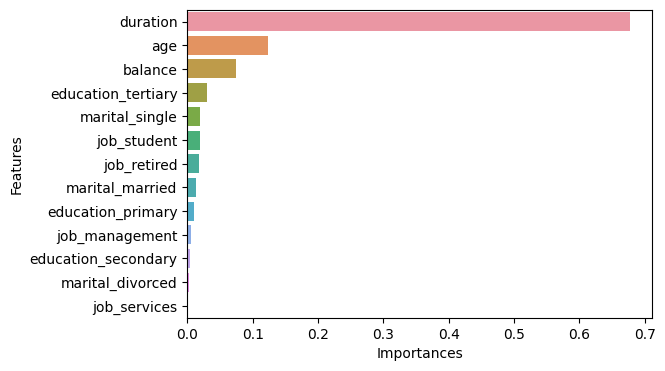

In [47]:
# Visualize the feature importances
plt.figure(figsize = (6, 4))
rfimpdf = pd.DataFrame(data = {'Features': X_train.columns, 'Importances': rfimp})
rfimpdf = rfimpdf.sort_values(by = 'Importances', ascending = False)
sns.barplot(data = rfimpdf, x = 'Importances', y = 'Features', orient = 'h');

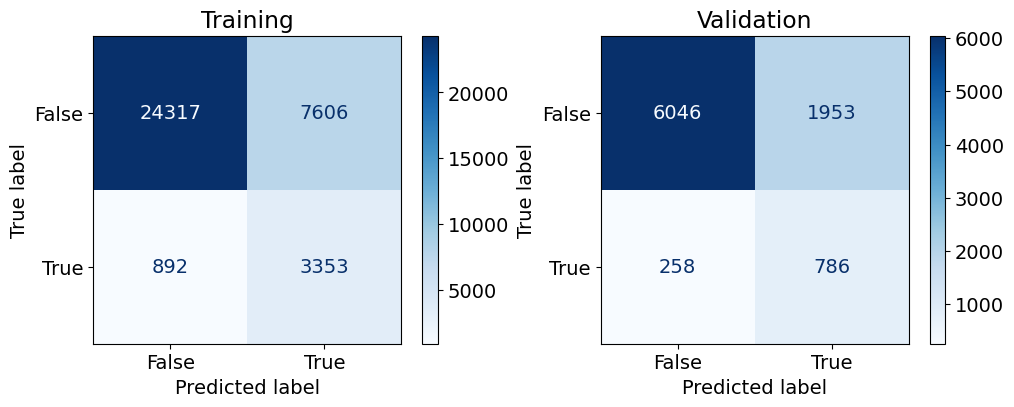

In [48]:
# Display the confusion matrices for the model on the training and validation data
plt.rcParams.update({'font.size': 14})
fig, ax = plt.subplots(1, 2, figsize = (12, 4))
ConfusionMatrixDisplay.from_estimator(rf, X_train, y_train, cmap = plt.cm.Blues, ax = ax[0])
ConfusionMatrixDisplay.from_estimator(rf, X_val, y_val, cmap = plt.cm.Blues, ax = ax[1])
ax[0].set_title('Training')
ax[1].set_title('Validation');

In [49]:
# Compute the accuracy scores on the training and validation data
# Obtain predictions
y_pred_train = rf.predict(X_train)
y_pred_val = rf.predict(X_val)

# Compute accuracy scores
train_acc = accuracy_score(y_train, y_pred_train)
val_acc = accuracy_score(y_val, y_pred_val)

print('Accuracy on the training data = {}'.format(train_acc))
print('Accuracy on the validation data = {}'.format(val_acc))

Accuracy on the training data = 0.7650409201504093
Accuracy on the validation data = 0.7555014928674113


In [50]:
# Compute the ROC AUC scores for the training and the validation data
# Obtain predicted probabilities for class '1'
train_probabilities = rf.predict_proba(X_train)[:, 1]
val_probabilities = rf.predict_proba(X_val)[:, 1]

# Compute ROC AUC scores
train_auc = roc_auc_score(y_train, train_probabilities)
val_auc = roc_auc_score(y_val, val_probabilities)

print('ROC AUC score for the training data = {}'.format(train_auc))
print('ROC AUC score for the validation data = {}'.format(val_auc))

ROC AUC score for the training data = 0.8544773759385021
ROC AUC score for the validation data = 0.8319852242066657


# Part 3 - Random Forest: Hyperparameter Tuning
In this section, we will:
- Tune the random forest model for the following hyperparameters:
  - Number of estimators
  - Maximum tree depth
- Tune the random forest model for a combination of number of estimators and maximum tree depth

## Subpart 1 - Hyperparameter Tuning: Number of Estimators

In [ ]:
# Define a list of number of estimators to tune over
num_estimators = np.arange(50, 550, 50)

# Create and train a random forest model for each value of number of estimators
performance_df = pd.DataFrame(data = None)

# Use a for loop to loop over the different models and capture their performances
indexcount = -1
for current_num_estimators in num_estimators:
    indexcount = indexcount + 1
    
    # Create a random forest model with the current specifications
    # Use the current number of estimators, a maximum tree depth of 5, and set the class weight as 'balanced'
    # Set the random state parameter to 123
    current_rf = RandomForestClassifier(n_estimators=current_num_estimators,
                                       max_depth=5,
                                       class_wei)
    
    # Fit the model on the training data
    ##### CODE HERE #####
    
    print('\n Training for {} estimators is complete'.format(current_num_estimators))
    
    # Obtain predictions
    current_y_pred_train = ##### CODE HERE #####
    current_y_pred_val = ##### CODE HERE #####
    
    # Compute accuracy scores
    current_train_acc = ##### CODE HERE #####
    current_val_acc = ##### CODE HERE #####
    
    # Obtain predicted probabilities for class '1'
    current_train_probabilities = ##### CODE HERE #####
    current_val_probabilities = ##### CODE HERE #####
    
    # Compute ROC AUC scores
    current_train_auc = ##### CODE HERE #####
    current_val_auc = ##### CODE HERE #####
    
    tempdf = pd.DataFrame(index = [indexcount],
                          data = {'Number of Estimators': current_num_estimators,
                                  'Training Accuracy': current_train_acc,
                                  'Validation Accuracy': current_val_acc,
                                  'Training ROC AUC': current_train_auc,
                                  'Validation ROC AUC': current_val_auc})
    
    performance_df = pd.concat([performance_df, tempdf])

performance_df.set_index('Number of Estimators')

In [ ]:
# Visualize variation in validation accuracy scores with respect to number of estimators
plt.figure(figsize = (10, 4))

sns.lineplot(data = performance_df, x = 'Number of Estimators', y = 'Validation Accuracy', marker = 'o', markersize = 12)
plt.title('Validation Accuracy Scores by Number of Estimators')
plt.ylabel('Accuracy')
plt.xlabel('Number of Estimators')
plt.xticks(num_estimators);

In [ ]:
# Visualize variation in validation ROC AUC scores with respect to number of estimators
plt.figure(figsize = (10, 4))

sns.lineplot(data = performance_df, x = 'Number of Estimators', y = 'Validation ROC AUC', marker = 'o', markersize = 12)
plt.title('Validation ROC AUC Scores by Number of Estimators')
plt.ylabel('ROC AUC Score')
plt.xlabel('Number of Estimators')
plt.xticks(num_estimators);

## Subpart 2 - Hyperparameter Tuning: Maximum Tree Depth

In [ ]:
# Define a list of maximum tree depth values to tune over
max_tree_depths = np.arange(1, 11, 1)

# Create and train a random forest model for each value of maximum tree depth
performance_df = pd.DataFrame(data = None)

# Use a for loop to loop over the different models and capture their performances
indexcount = -1
for current_max_tree_depth in max_tree_depths:
    indexcount = indexcount + 1
    
    # Create a random forest model with the current specifications
    # Use 100 estimators, the current maximum tree depth, and set the class weight as 'balanced'
    # Set the random state parameter to 123
    current_rf = ##### CODE HERE #####
    
    # Fit the model on the training data
    ##### CODE HERE #####
    
    print('\n Training for tree depth of {} is complete'.format(current_max_tree_depth))
    
    # Obtain predictions
    current_y_pred_train = ##### CODE HERE #####
    current_y_pred_val = ##### CODE HERE #####
    
    # Compute accuracy scores
    current_train_acc = ##### CODE HERE #####
    current_val_acc = ##### CODE HERE #####
    
    # Obtain predicted probabilities for class '1'
    current_train_probabilities = ##### CODE HERE #####
    current_val_probabilities = ##### CODE HERE #####
    
    # Compute ROC AUC scores
    current_train_auc = ##### CODE HERE #####
    current_val_auc = ##### CODE HERE #####
    
    tempdf = pd.DataFrame(index = [indexcount],
                          data = {'Maximum Tree Depth': current_max_tree_depth,
                                  'Training Accuracy': current_train_acc,
                                  'Validation Accuracy': current_val_acc,
                                  'Training ROC AUC': current_train_auc,
                                  'Validation ROC AUC': current_val_auc})
    
    performance_df = pd.concat([performance_df, tempdf])

performance_df.set_index('Maximum Tree Depth')

In [ ]:
# Visualize variation in validation accuracy scores with respect to maximum tree depth
plt.figure(figsize = (10, 4))

sns.lineplot(data = performance_df, x = 'Maximum Tree Depth', y = 'Validation Accuracy', marker = 'o', markersize = 12)
plt.title('Validation Accuracy Scores by Maximum Tree Depth')
plt.ylabel('Accuracy')
plt.xlabel('Maximum Tree Depth')
plt.xticks(max_tree_depths);

In [ ]:
# Visualize variation in validation ROC AUC scores with respect to maximum tree depth
plt.figure(figsize = (10, 4))

sns.lineplot(data = performance_df, x = 'Maximum Tree Depth', y = 'Validation ROC AUC', marker = 'o', markersize = 12)
plt.title('Validation ROC AUC Scores by Maximum Tree Depth')
plt.ylabel('ROC AUC Score')
plt.xlabel('Maximum Tree Depth')
plt.xticks(max_tree_depths);

## Subpart 3 - Hyperparameter Tuning: Combinations of Hyperparameters

In [ ]:
# Initialize a basic random forest classifier model
# Set the class weight as 'balanced'
# Set the random state parameter to 123
base_grid_model = ##### CODE HERE #####

# Define a range of hyperparameter values to tune for and store them in a dictionary
parameters_grid = {'n_estimators': [100, 200],
                   'max_depth': [5, 7]}

# Perform a grid search using the 'GridSearchCV()' method to obtain a grid on which to fit the training data
# Use ROC AUC score as a scoring metric
# Use the default number of cross-validation folds
# Set the 'verbose' parameter to 3 or more to display useful results during the process
grid = ##### CODE HERE #####

# Fit the model on the training data
grid_model = ##### CODE HERE #####

# Print the optimal values of 'n_estimators' and 'max_depth'
best_n_estimators = grid_model.best_params_['n_estimators']
best_max_depth = grid_model.best_params_['max_depth']
best_roc_auc_score = grid_model.best_score_

print('\n The optimal model has {} estimators, each of maximum tree depth {}, and it has an ROC AUC score of {}.'.format(best_n_estimators, best_max_depth, best_roc_auc_score))

# Part 4 - Gradient Boosted Tree
We will now fit a gradient boosted tree model to the data and study the performance of the model on the training and validation data.

In [ ]:
# Create a gradient boosted tree classifier model
# Use 100 estimators, a maximum tree depth of 5, a learning rate of 0.1, and set the class weight as 'balanced'
# Set the random state parameter to 123
gbt = ##### CODE HERE #####

# Fit the model to the training data
##### CODE HERE #####

In [ ]:
# Obtain feature importances from the model
gbtimp = ##### CODE HERE #####
gbtimp

In [ ]:
# Visualize the feature importances
plt.figure(figsize = (6, 4))
gbtimpdf = pd.DataFrame(data = {'Features': X_train.columns, 'Importances': gbtimp})
gbtimpdf = gbtimpdf.sort_values(by = 'Importances', ascending = False)
sns.barplot(data = gbtimpdf, x = 'Importances', y = 'Features', orient = 'h');

In [ ]:
# Display the confusion matrices for the model on the training and validation data
plt.rcParams.update({'font.size': 14})
fig, ax = plt.subplots(1, 2, figsize = (12, 4))
ConfusionMatrixDisplay.from_estimator(gbt, X_train, y_train, cmap = plt.cm.Blues, ax = ax[0])
ConfusionMatrixDisplay.from_estimator(gbt, X_val, y_val, cmap = plt.cm.Blues, ax = ax[1])
ax[0].set_title('Training')
ax[1].set_title('Validation');

In [ ]:
# Compute the accuracy scores on the training and validation data
# Obtain predictions
y_pred_train = ##### CODE HERE #####
y_pred_val = ##### CODE HERE #####

# Compute accuracy scores
train_acc = ##### CODE HERE #####
val_acc = ##### CODE HERE #####

print('Accuracy on the training data = {}'.format(train_acc))
print('Accuracy on the validation data = {}'.format(val_acc))

In [ ]:
# Compute the ROC AUC scores for the training and the validation data
# Obtain predicted probabilities for class '1'
train_probabilities = ##### CODE HERE #####
val_probabilities = ##### CODE HERE #####

# Compute ROC AUC scores
train_auc = ##### CODE HERE #####
val_auc = ##### CODE HERE #####

print('ROC AUC score for the training data = {}'.format(train_auc))
print('ROC AUC score for the validation data = {}'.format(val_auc))

# Part 5 - Gradient Boosted Tree: Hyperparameter Tuning
In this section, we will:
- Tune the gradient boosted tree model for the following hyperparameters:
  - Number of estimators
  - Maximum tree depth
  - Learning rate
- Tune the gradient boosted tree model for a combination of number of estimators, maximum tree depth and learning rate

## Subpart 1 - Hyperparameter Tuning: Number of Estimators

In [ ]:
# Define a list of number of estimators to tune over
num_estimators = np.arange(50, 550, 50)

# Create and train a gradient boosted tree model for each value of number of estimators
performance_df = pd.DataFrame(data = None)

# Use a for loop to loop over the different models and capture their performances
indexcount = -1
for current_num_estimators in num_estimators:
    indexcount = indexcount + 1
    
    # Create a gradient boosted tree model with the current specifications
    # Use the current number of estimators, a maximum tree depth of 5, a learning rate of 0.1, and set the class weight as 'balanced'
    # Set the random state parameter to 123
    current_gbt = ##### CODE HERE #####
    
    # Fit the model on the training data
    ##### CODE HERE #####
    
    print('\n Training for {} estimators is complete'.format(current_num_estimators))
    
    # Obtain predictions
    current_y_pred_train = ##### CODE HERE #####
    current_y_pred_val = ##### CODE HERE #####
    
    # Compute accuracy scores
    current_train_acc = ##### CODE HERE #####
    current_val_acc = ##### CODE HERE #####
    
    # Obtain predicted probabilities for class '1'
    current_train_probabilities = ##### CODE HERE #####
    current_val_probabilities = ##### CODE HERE #####
    
    # Compute ROC AUC scores
    current_train_auc = ##### CODE HERE #####
    current_val_auc = ##### CODE HERE #####
    
    tempdf = pd.DataFrame(index = [indexcount],
                          data = {'Number of Estimators': current_num_estimators,
                                  'Training Accuracy': current_train_acc,
                                  'Validation Accuracy': current_val_acc,
                                  'Training ROC AUC': current_train_auc,
                                  'Validation ROC AUC': current_val_auc})
    
    performance_df = pd.concat([performance_df, tempdf])

performance_df.set_index('Number of Estimators')

In [ ]:
# Visualize variation in validation accuracy scores with respect to number of estimators
plt.figure(figsize = (10, 4))

sns.lineplot(data = performance_df, x = 'Number of Estimators', y = 'Validation Accuracy', marker = 'o', markersize = 12)
plt.title('Validation Accuracy Scores by Number of Estimators')
plt.ylabel('Accuracy')
plt.xlabel('Number of Estimators')
plt.xticks(num_estimators);

In [ ]:
# Visualize variation in validation ROC AUC scores with respect to number of estimators
plt.figure(figsize = (10, 4))

sns.lineplot(data = performance_df, x = 'Number of Estimators', y = 'Validation ROC AUC', marker = 'o', markersize = 12)
plt.title('Validation ROC AUC Scores by Number of Estimators')
plt.ylabel('ROC AUC Score')
plt.xlabel('Number of Estimators')
plt.xticks(num_estimators);

## Subpart 2 - Hyperparameter Tuning: Maximum Tree Depth

In [ ]:
# Define a list of maximum tree depth values to tune over
max_tree_depths = np.arange(1, 11, 1)

# Create and train a gradient boosted tree model for each value of maximum tree depth
performance_df = pd.DataFrame(data = None)

# Use a for loop to loop over the different models and capture their performances
indexcount = -1
for current_max_tree_depth in max_tree_depths:
    indexcount = indexcount + 1
    
    # Create a gradient boosted tree model with the current specifications
    # Use 100 estimators, the current maximum tree depth, a learning rate of 0.1, and set the class weight as 'balanced'
    # Set the random state parameter to 123
    current_gbt = ##### CODE HERE #####
    
    # Fit the model on the training data
    ##### CODE HERE #####
    
    print('\n Training for tree depth of {} is complete'.format(current_max_tree_depth))
    
    # Obtain predictions
    current_y_pred_train = ##### CODE HERE #####
    current_y_pred_val = ##### CODE HERE #####
    
    # Compute accuracy scores
    current_train_acc = ##### CODE HERE #####
    current_val_acc = ##### CODE HERE #####
    
    # Obtain predicted probabilities for class '1'
    current_train_probabilities = ##### CODE HERE #####
    current_val_probabilities = ##### CODE HERE #####
    
    # Compute ROC AUC scores
    current_train_auc = ##### CODE HERE #####
    current_val_auc = ##### CODE HERE #####
    
    tempdf = pd.DataFrame(index = [indexcount],
                          data = {'Maximum Tree Depth': current_max_tree_depth,
                                  'Training Accuracy': current_train_acc,
                                  'Validation Accuracy': current_val_acc,
                                  'Training ROC AUC': current_train_auc,
                                  'Validation ROC AUC': current_val_auc})
    
    performance_df = pd.concat([performance_df, tempdf])

performance_df.set_index('Maximum Tree Depth')

In [ ]:
# Visualize variation in validation accuracy scores with respect to maximum tree depth
plt.figure(figsize = (10, 4))

sns.lineplot(data = performance_df, x = 'Maximum Tree Depth', y = 'Validation Accuracy', marker = 'o', markersize = 12)
plt.title('Validation Accuracy Scores by Maximum Tree Depth')
plt.ylabel('Accuracy')
plt.xlabel('Maximum Tree Depth')
plt.xticks(max_tree_depths);

In [ ]:
# Visualize variation in validation ROC AUC scores with respect to maximum tree depth
plt.figure(figsize = (10, 4))

sns.lineplot(data = performance_df, x = 'Maximum Tree Depth', y = 'Validation ROC AUC', marker = 'o', markersize = 12)
plt.title('Validation ROC AUC Scores by Maximum Tree Depth')
plt.ylabel('ROC AUC Score')
plt.xlabel('Maximum Tree Depth')
plt.xticks(max_tree_depths);

## Subpart 3 - Hyperparameter Tuning: Learning Rate

In [ ]:
# Define a list of learning rate values to tune over
learning_rates = np.arange(0.02, 0.22, 0.02)

# Create and train a gradient boosted tree model for each value of learning rate
performance_df = pd.DataFrame(data = None)

# Use a for loop to loop over the different models and capture their performances
indexcount = -1
for current_learning_rate in learning_rates:
    indexcount = indexcount + 1
    
    # Create a gradient boosted tree model with the current specifications
    # Use 100 estimators, a maximum tree depth of 5, the current learning rate, and set the class weight as 'balanced'
    # Set the random state parameter to 123
    current_gbt = ##### CODE HERE #####
    
    # Fit the model on the training data
    ##### CODE HERE #####
    
    print('\n Training for learning rate of {} is complete'.format(np.round(current_learning_rate, 2)))
    
    # Obtain predictions
    current_y_pred_train = ##### CODE HERE #####
    current_y_pred_val = ##### CODE HERE #####
    
    # Compute accuracy scores
    current_train_acc = ##### CODE HERE #####
    current_val_acc = ##### CODE HERE #####
    
    # Obtain predicted probabilities for class '1'
    current_train_probabilities = ##### CODE HERE #####
    current_val_probabilities = ##### CODE HERE #####
    
    # Compute ROC AUC scores
    current_train_auc = ##### CODE HERE #####
    current_val_auc = ##### CODE HERE #####
    
    tempdf = pd.DataFrame(index = [indexcount],
                          data = {'Learning Rate': current_learning_rate,
                                  'Training Accuracy': current_train_acc,
                                  'Validation Accuracy': current_val_acc,
                                  'Training ROC AUC': current_train_auc,
                                  'Validation ROC AUC': current_val_auc})
    
    performance_df = pd.concat([performance_df, tempdf])

performance_df.set_index('Learning Rate')

In [ ]:
# Visualize variation in validation accuracy scores with respect to learning rate
plt.figure(figsize = (10, 4))

sns.lineplot(data = performance_df, x = 'Learning Rate', y = 'Validation Accuracy', marker = 'o', markersize = 12)
plt.title('Validation Accuracy Scores by Learning Rate')
plt.ylabel('Accuracy')
plt.xlabel('Learning Rate')
plt.xticks(learning_rates);

In [ ]:
# Visualize variation in validation ROC AUC scores with respect to learning rate
plt.figure(figsize = (10, 4))

sns.lineplot(data = performance_df, x = 'Learning Rate', y = 'Validation ROC AUC', marker = 'o', markersize = 12)
plt.title('Validation ROC AUC Scores by Learning Rate')
plt.ylabel('ROC AUC Score')
plt.xlabel('Learning Rate')
plt.xticks(learning_rates);

## Subpart 4 - Hyperparameter Tuning: Combinations of Hyperparameters

In [ ]:
# Initialize a basic gradient boosted classifier model
# Set the class weight as 'balanced'
# Set the random state parameter to 123
base_grid_model = ##### CODE HERE #####

# Define a range of hyperparameter values to tune for and store them in a dictionary
parameters_grid = {'n_estimators': [50, 100],
                   'max_depth': [7, 9],
                   'learning_rate': [0.06, 0.08]}

# Perform a grid search using the 'GridSearchCV()' method to obtain a grid on which to fit the training data
# Use ROC AUC score as a scoring metric
# Use the default number of cross-validation folds
# Set the 'verbose' parameter to 3 or more to display useful results during the process
grid = ##### CODE HERE #####

# Fit the model on the training data
grid_model = ##### CODE HERE #####

# Print the optimal values of 'n_estimators', 'max_depth' and 'learning_rate'
best_n_estimators = grid_model.best_params_['n_estimators']
best_max_depth = grid_model.best_params_['max_depth']
best_learning_rate = grid_model.best_params_['learning_rate']
best_roc_auc_score = grid_model.best_score_

print('\n The optimal model has {} estimators, each of maximum tree depth {}, a learning rate of {}, and it has an ROC AUC score of {}.'.format(best_n_estimators, best_max_depth, best_learning_rate, best_roc_auc_score))